#画图程序

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import sqrt
from scipy.interpolate import spline

In [2]:
print(os.getcwd())

E:\Research Project\DKASC, Alice Springs


In [3]:
os.listdir(os.getcwd())

['.idea',
 '.ipynb_checkpoints',
 '101-Site_DKA-WeatherStation',
 '96-Site_DKA-MasterMeter1',
 'Alice_Springs_2016-2020',
 'CNN模型训练0809.ipynb',
 'Dataset',
 'logs',
 'picture',
 'Predict',
 'Program backups',
 'temp',
 'venv',
 '异常值检验.ipynb',
 '数据集_小波包分解重构数据.ipynb',
 '数据集_预处理_第二版0702.ipynb',
 '测试小波分解.ipynb',
 '测试模型0622.ipynb',
 '测试模型0704.ipynb',
 '测试模型0704批量.ipynb',
 '测试模型小波包分解0704批量.ipynb',
 '画图.ipynb',
 '画图0704.ipynb',
 '相关性分析.ipynb',
 '笔记.ipynb',
 '训练模型0622.ipynb',
 '训练模型0702.ipynb',
 '训练模型0703 WPD.ipynb']

In [4]:
os.chdir("./Predict/")
os.listdir(os.getcwd())

['1Atest_pred_-WDWDR_svm&bp&dnn.csv',
 'keras_model1.csv',
 'maetest0-8.csv',
 'predict_1A-WDWDR.csv',
 'predict_1A.csv',
 'predict_1AM1.csv',
 'predict_1AM2.csv',
 'predict_1AM3.csv',
 'predict_1A_model1.csv',
 'predict_1A_model2.csv',
 'predict_1A_model3.csv',
 'predict_1B_model1.csv',
 'predict_train_1A-WDWDR.csv',
 'predict_train_1A.csv',
 'rmsetest0-8.csv',
 'Station_4_predict.csv',
 'Station_4_Predict_四季.csv',
 'Station_4_Predict_四季_改正.csv',
 'Station_4_Predict_多指标.csv',
 'WPD_Station_4_predict.csv',
 '九个站点评价.xlsx',
 '九个站点评价指标.csv',
 '九个站点评价指标WPD.csv',
 '站点4季节评价.xlsx']

In [5]:
predict_ = pd.read_csv('Station_4_predict.csv')
predict_WPD= pd.read_csv('WPD_Station_4_predict.csv')

In [6]:
predict_.head()

,Month(t-12),Day(t-12),Hour(t-12),Minutes(t-12),Temperature(°C)(t-12),Relative Humidity(%)(t-12),Wind Direction(Degrees)(t-12),Daily Rainfall(mm)(t-12),Global Horizontal Radiation(W/m²)(t-12),Diffuse Horizontal Radiation(W/m²)(t-12),Station_4(t-12),Station_4(t),BP,DNN,LSTM
0,1.0,1.0,0.0,0.000000,30.020725,20.125513,32.213470,0.0,1.543787,1.349848,0.000533,0.000067,-0.019865,-0.001145,-0.003218
1,1.0,1.0,0.0,5.000000,29.958654,20.040049,32.158790,0.0,1.373370,1.244123,0.000433,0.000067,-0.019865,-0.001145,-0.003215
2,1.0,1.0,0.0,10.000000,29.884493,20.013313,32.155807,0.0,1.142953,0.992849,0.000867,0.000200,-0.019864,-0.001144,-0.003228
3,1.0,1.0,0.0,14.999999,29.831553,20.068233,32.178555,0.0,0.709036,0.611533,0.000767,0.000200,-0.019864,-0.001143,-0.003321
4,1.0,1.0,0.0,20.000000,29.750330,20.086567,32.166214,0.0,1.058623,0.814599,0.000533,0.000400,-0.019863,-0.001146,-0.003203


In [7]:
predict_.columns

Index(['Month(t-12)', 'Day(t-12)', 'Hour(t-12)', 'Minutes(t-12)',
       'Temperature(°C)(t-12)', 'Relative Humidity(%)(t-12)',
       'Wind Direction(Degrees)(t-12)', 'Daily Rainfall(mm)(t-12)',
       'Global Horizontal Radiation(W/m²)(t-12)',
       'Diffuse Horizontal Radiation(W/m²)(t-12)', 'Station_4(t-12)',
       'Station_4(t)', 'BP', 'DNN', 'LSTM'],
      dtype='object')

In [8]:
predict_WPD.head()

,Month(t-12),Day(t-12),Hour(t-12),Minutes(t-12),Temperature(°C)(t-12),Relative Humidity(%)(t-12),Wind Direction(Degrees)(t-12),Daily Rainfall(mm)(t-12),Global Horizontal Radiation(W/m²)(t-12),Diffuse Horizontal Radiation(W/m²)(t-12),A(t-12),D(t-12),Station_4(t-12),Station_4(t),WPD_BP,WPD_DNN,WPD_LSTM
0,1.0,1.0,0.0,0.000000,30.020725,20.125513,32.213470,0.0,1.543787,1.349848,0.000500,0.000033,0.000533,0.000067,-0.019867,-0.001382,-0.001917
1,1.0,1.0,0.0,5.000000,29.958654,20.040049,32.158790,0.0,1.373370,1.244123,0.000575,-0.000141,0.000433,0.000067,-0.019867,-0.001384,-0.001917
2,1.0,1.0,0.0,10.000000,29.884493,20.013313,32.155807,0.0,1.142953,0.992849,0.000654,0.000213,0.000867,0.000200,-0.019867,-0.001385,-0.001917
3,1.0,1.0,0.0,14.999999,29.831553,20.068233,32.178555,0.0,0.709036,0.611533,0.000776,-0.000009,0.000767,0.000200,-0.019867,-0.001386,-0.001917
4,1.0,1.0,0.0,20.000000,29.750330,20.086567,32.166214,0.0,1.058623,0.814599,0.000650,-0.000117,0.000533,0.000400,-0.019867,-0.001389,-0.001917


In [9]:
predict_WPD.columns

Index(['Month(t-12)', 'Day(t-12)', 'Hour(t-12)', 'Minutes(t-12)',
       'Temperature(°C)(t-12)', 'Relative Humidity(%)(t-12)',
       'Wind Direction(Degrees)(t-12)', 'Daily Rainfall(mm)(t-12)',
       'Global Horizontal Radiation(W/m²)(t-12)',
       'Diffuse Horizontal Radiation(W/m²)(t-12)', 'A(t-12)', 'D(t-12)',
       'Station_4(t-12)', 'Station_4(t)', 'WPD_BP', 'WPD_DNN', 'WPD_LSTM'],
      dtype='object')

In [10]:
predict_['WPD_BP'] = predict_WPD['WPD_BP']

In [11]:
predict_['WPD_DNN'] = predict_WPD['WPD_DNN']

In [12]:
predict_['WPD_LSTM'] = predict_WPD['WPD_LSTM']

In [13]:
predict_.head()

,Month(t-12),Day(t-12),Hour(t-12),Minutes(t-12),Temperature(°C)(t-12),Relative Humidity(%)(t-12),Wind Direction(Degrees)(t-12),Daily Rainfall(mm)(t-12),Global Horizontal Radiation(W/m²)(t-12),Diffuse Horizontal Radiation(W/m²)(t-12),Station_4(t-12),Station_4(t),BP,DNN,LSTM,WPD_BP,WPD_DNN,WPD_LSTM
0,1.0,1.0,0.0,0.000000,30.020725,20.125513,32.213470,0.0,1.543787,1.349848,0.000533,0.000067,-0.019865,-0.001145,-0.003218,-0.019867,-0.001382,-0.001917
1,1.0,1.0,0.0,5.000000,29.958654,20.040049,32.158790,0.0,1.373370,1.244123,0.000433,0.000067,-0.019865,-0.001145,-0.003215,-0.019867,-0.001384,-0.001917
2,1.0,1.0,0.0,10.000000,29.884493,20.013313,32.155807,0.0,1.142953,0.992849,0.000867,0.000200,-0.019864,-0.001144,-0.003228,-0.019867,-0.001385,-0.001917
3,1.0,1.0,0.0,14.999999,29.831553,20.068233,32.178555,0.0,0.709036,0.611533,0.000767,0.000200,-0.019864,-0.001143,-0.003321,-0.019867,-0.001386,-0.001917
4,1.0,1.0,0.0,20.000000,29.750330,20.086567,32.166214,0.0,1.058623,0.814599,0.000533,0.000400,-0.019863,-0.001146,-0.003203,-0.019867,-0.001389,-0.001917


In [14]:
predict_.columns

Index(['Month(t-12)', 'Day(t-12)', 'Hour(t-12)', 'Minutes(t-12)',
       'Temperature(°C)(t-12)', 'Relative Humidity(%)(t-12)',
       'Wind Direction(Degrees)(t-12)', 'Daily Rainfall(mm)(t-12)',
       'Global Horizontal Radiation(W/m²)(t-12)',
       'Diffuse Horizontal Radiation(W/m²)(t-12)', 'Station_4(t-12)',
       'Station_4(t)', 'BP', 'DNN', 'LSTM', 'WPD_BP', 'WPD_DNN', 'WPD_LSTM'],
      dtype='object')

In [15]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100


In [16]:
predict_.columns

Index(['Month(t-12)', 'Day(t-12)', 'Hour(t-12)', 'Minutes(t-12)',
       'Temperature(°C)(t-12)', 'Relative Humidity(%)(t-12)',
       'Wind Direction(Degrees)(t-12)', 'Daily Rainfall(mm)(t-12)',
       'Global Horizontal Radiation(W/m²)(t-12)',
       'Diffuse Horizontal Radiation(W/m²)(t-12)', 'Station_4(t-12)',
       'Station_4(t)', 'BP', 'DNN', 'LSTM', 'WPD_BP', 'WPD_DNN', 'WPD_LSTM'],
      dtype='object')

In [17]:
predict_['DNN'].values

array([-0.00114537, -0.0011452 , -0.00114375, ..., -0.00130601,
       -0.00130998, -0.00131393])

In [18]:
predict_['Station_4(t)'].values

array([6.6700990e-05, 6.6700990e-05, 2.0000075e-04, ..., 3.9999935e-04,
       7.3333393e-04, 7.3333393e-04])

In [19]:
predict_[ 'LSTM'].values

array([-0.00321756, -0.00321501, -0.00322814, ..., -0.00535253,
       -0.00537659, -0.00538563])

In [20]:
predict_['WPD_LSTM'].values

array([-0.00191657, -0.00191657, -0.00191657, ..., -0.00291464,
       -0.00291464, -0.00291464])

In [21]:
dnn_mse = metrics.mean_squared_error(predict_['Station_4(t)'].values, predict_['DNN'].values)
dnn_rmse = math.sqrt(mean_squared_error(predict_['Station_4(t)'].values, predict_['DNN'].values))
dnn_mae = metrics.mean_absolute_error(predict_['Station_4(t)'].values, predict_['DNN'].values)
dnn_mape = mape(predict_['Station_4(t)'].values, predict_['DNN'].values)
dnn_smape = smape(predict_['Station_4(t)'].values, predict_['DNN'].values)

lstm_mse = metrics.mean_squared_error(predict_['Station_4(t)'].values, predict_['LSTM'].values)
lstm_rmse = math.sqrt(mean_squared_error(predict_['Station_4(t)'].values, predict_['LSTM'].values))
lstm_mae = metrics.mean_absolute_error(predict_['Station_4(t)'].values, predict_['LSTM'].values)
lstm_mape = mape(predict_['Station_4(t)'].values, predict_['LSTM'].values)
lstm_smape = smape(predict_['Station_4(t)'].values, predict_['LSTM'].values)

lstm_wpd_mse = metrics.mean_squared_error(predict_['Station_4(t)'].values, predict_['WPD_LSTM'].values)
lstm_wpd_rmse = math.sqrt(mean_squared_error(predict_['Station_4(t)'].values, predict_['WPD_LSTM'].values))
lstm_wpd_mae = metrics.mean_absolute_error(predict_['Station_4(t)'].values, predict_['WPD_LSTM'].values)
lstm_wpd_mape = mape(predict_['Station_4(t)'].values, predict_['WPD_LSTM'].values)
lstm_wpd_smape = smape(predict_['Station_4(t)'].values, predict_['WPD_LSTM'].values)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [22]:
evaluate = pd.DataFrame(columns=['Test','DNN','LSTM','WPD-LSTM'])
evaluate['Te']=['MSE','RMSE','MAE','MAPE','SMAPE']
evaluate=evaluate.set_index('Te',drop=True)

evaluate['WPD-LSTM']=[dnn_mse,dnn_rmse,dnn_mae,dnn_mape ,dnn_smape]
evaluate['LSTM']=[lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape]
evaluate['DNN']=[lstm_wpd_mse,lstm_wpd_rmse,lstm_wpd_mae,lstm_wpd_mape ,lstm_wpd_smape]
evaluate

,Test,DNN,LSTM,WPD-LSTM
Te,,,,
MSE,NaN,0.075329,0.059574,0.061620
RMSE,NaN,0.274462,0.244077,0.248234
MAE,NaN,0.135832,0.103838,0.096585
MAPE,NaN,inf,inf,inf
SMAPE,NaN,114.448154,110.375325,111.514639


In [23]:
evaluate.to_csv('../predict/Station_4_Predict_多指标.csv',index=True)

In [24]:
# 澳大利亚的春天是在9月～11月，夏季12月～2月，秋季3月～5月，冬季6月～8

In [25]:
predict_[['Month(t-12)', 'Day(t-12)', 'Hour(t-12)', 'Minutes(t-12)']] = predict_[['Month(t-12)', 'Day(t-12)', 'Hour(t-12)', 'Minutes(t-12)']].astype("int")

# Day0120 = predict_.loc[(predict_['Year'] == 2020) & (predict_['Month'] == ) & (predict_['Day'] == 20),:]
chun = predict_.loc[(predict_['Month(t-12)'] == 9 ) | (predict_['Month(t-12)'] == 10 )|(predict_['Month(t-12)'] == 11 ),:]
xia = predict_.loc[(predict_['Month(t-12)'] == 12 ) | (predict_['Month(t-12)'] == 1 )|(predict_['Month(t-12)'] == 2 ),:]
qiu = predict_.loc[(predict_['Month(t-12)'] == 3 ) | (predict_['Month(t-12)'] == 4 )|(predict_['Month(t-12)'] == 5 ),:]
dong = predict_.loc[(predict_['Month(t-12)'] == 6 ) | (predict_['Month(t-12)'] == 7 )|(predict_['Month(t-12)'] == 8 ),:]

# 春

In [26]:
jijie = chun

dnn_rmse = math.sqrt(mean_squared_error(jijie['Station_4(t)'].values, jijie['DNN'].values))
dnn_mae = metrics.mean_absolute_error(jijie['Station_4(t)'].values, jijie['DNN'].values)

lstm_rmse = math.sqrt(mean_squared_error(jijie['Station_4(t)'].values, jijie['LSTM'].values))
lstm_mae = metrics.mean_absolute_error(jijie['Station_4(t)'].values, jijie['LSTM'].values)

lstm_wpd_rmse = math.sqrt(mean_squared_error(jijie['Station_4(t)'].values, jijie['WPD_LSTM'].values))
lstm_wpd_mae = metrics.mean_absolute_error(jijie['Station_4(t)'].values, jijie['WPD_LSTM'].values)

chun_dnn_rmse = dnn_rmse
chun_dnn_mae = dnn_mae
chun_lstm_rmse = lstm_rmse
chun_lstm_mae = lstm_mae
chun_lstm_wpd_rmse = lstm_wpd_rmse
chun_lstm_wpd_mae = lstm_wpd_mae

# 夏

In [27]:
jijie = xia

dnn_rmse = math.sqrt(mean_squared_error(jijie['Station_4(t)'].values, jijie['DNN'].values))
dnn_mae = metrics.mean_absolute_error(jijie['Station_4(t)'].values, jijie['DNN'].values)

lstm_rmse = math.sqrt(mean_squared_error(jijie['Station_4(t)'].values, jijie['LSTM'].values))
lstm_mae = metrics.mean_absolute_error(jijie['Station_4(t)'].values, jijie['LSTM'].values)

lstm_wpd_rmse = math.sqrt(mean_squared_error(jijie['Station_4(t)'].values, jijie['WPD_LSTM'].values))
lstm_wpd_mae = metrics.mean_absolute_error(jijie['Station_4(t)'].values, jijie['WPD_LSTM'].values)

xia_dnn_rmse = dnn_rmse
xia_dnn_mae = dnn_mae
xia_lstm_rmse = lstm_rmse
xia_lstm_mae = lstm_mae
xia_lstm_wpd_rmse = lstm_wpd_rmse
xia_lstm_wpd_mae = lstm_wpd_mae

# 秋

In [28]:
jijie = qiu

dnn_rmse = math.sqrt(mean_squared_error(jijie['Station_4(t)'].values, jijie['DNN'].values))
dnn_mae = metrics.mean_absolute_error(jijie['Station_4(t)'].values, jijie['DNN'].values)

lstm_rmse = math.sqrt(mean_squared_error(jijie['Station_4(t)'].values, jijie['LSTM'].values))
lstm_mae = metrics.mean_absolute_error(jijie['Station_4(t)'].values, jijie['LSTM'].values)

lstm_wpd_rmse = math.sqrt(mean_squared_error(jijie['Station_4(t)'].values, jijie['WPD_LSTM'].values))
lstm_wpd_mae = metrics.mean_absolute_error(jijie['Station_4(t)'].values, jijie['WPD_LSTM'].values)

qiu_dnn_rmse = dnn_rmse
qiu_dnn_mae = dnn_mae
qiu_lstm_rmse = lstm_rmse
qiu_lstm_mae = lstm_mae
qiu_lstm_wpd_rmse = lstm_wpd_rmse
qiu_lstm_wpd_mae = lstm_wpd_mae

# 冬

In [29]:
jijie = dong

dnn_rmse = math.sqrt(mean_squared_error(jijie['Station_4(t)'].values, jijie['DNN'].values))
dnn_mae = metrics.mean_absolute_error(jijie['Station_4(t)'].values, jijie['DNN'].values)

lstm_rmse = math.sqrt(mean_squared_error(jijie['Station_4(t)'].values, jijie['LSTM'].values))
lstm_mae = metrics.mean_absolute_error(jijie['Station_4(t)'].values, jijie['LSTM'].values)

lstm_wpd_rmse = math.sqrt(mean_squared_error(jijie['Station_4(t)'].values, jijie['WPD_LSTM'].values))
lstm_wpd_mae = metrics.mean_absolute_error(jijie['Station_4(t)'].values, jijie['WPD_LSTM'].values)

dong_dnn_rmse = dnn_rmse
dong_dnn_mae = dnn_mae
dong_lstm_rmse = lstm_rmse
dong_lstm_mae = lstm_mae
dong_lstm_wpd_rmse = lstm_wpd_rmse
dong_lstm_wpd_mae = lstm_wpd_mae

In [30]:
jijie_evaluate = pd.DataFrame(columns=['评测指标','DNN','LSTM','WPD-LSTM'])
jijie_evaluate['季节']=['春','春','夏','夏','秋','秋','冬','冬']
jijie_evaluate=jijie_evaluate.set_index('季节',drop=True)
jijie_evaluate['评测指标'] =['RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE']
jijie_evaluate['WPD-LSTM']=[chun_dnn_rmse,chun_dnn_mae,xia_dnn_rmse,xia_dnn_mae,qiu_dnn_rmse,qiu_dnn_mae,dong_dnn_rmse,dong_dnn_mae]

In [31]:
jijie_evaluate['LSTM']=[chun_lstm_rmse,chun_lstm_mae,xia_lstm_rmse,xia_lstm_mae,qiu_lstm_rmse,qiu_lstm_mae,dong_lstm_rmse,dong_lstm_mae]

In [32]:
jijie_evaluate['DNN']=[chun_lstm_wpd_rmse,chun_lstm_wpd_mae,xia_lstm_wpd_rmse,xia_lstm_wpd_mae,qiu_lstm_wpd_rmse,qiu_lstm_wpd_mae,dong_lstm_wpd_rmse,dong_lstm_wpd_mae]
jijie_evaluate

,评测指标,DNN,LSTM,WPD-LSTM
季节,,,,
春,RMSE,0.308594,0.262744,0.263061
春,MAE,0.164496,0.116633,0.103330
夏,RMSE,0.313791,0.292109,0.302299
夏,MAE,0.155129,0.128013,0.120962
秋,RMSE,0.263111,0.226117,0.229357
秋,MAE,0.128860,0.098100,0.091778
冬,RMSE,0.201890,0.185063,0.186133
冬,MAE,0.097948,0.074328,0.071431


In [33]:
chun_dnn_mae

0.10332992674118537

In [34]:
np.mean([chun_lstm_wpd_rmse,xia_lstm_wpd_rmse,qiu_lstm_wpd_rmse,dong_lstm_wpd_rmse])

0.271846451951283

In [35]:
np.mean([chun_lstm_rmse,xia_lstm_rmse,qiu_lstm_rmse,dong_lstm_rmse])

0.24150825476314236

In [36]:
 np.mean([chun_dnn_rmse,xia_dnn_rmse,qiu_dnn_rmse,dong_dnn_rmse])

0.24521245826899937

In [37]:
# jijie_evaluate.to_csv('../predict/Station_4_Predict_四季.csv',index=True)

# 2019

In [56]:

predict_[['Month(t-12)', 'Day(t-12)', 'Hour(t-12)', 'Minutes(t-12)']] = predict_[['Month(t-12)', 'Day(t-12)', 'Hour(t-12)', 'Minutes(t-12)']].astype("int")

# Day0120 = predict_.loc[(predict_['Year'] == 2020) & (predict_['Month'] == ) & (predict_['Day'] == 20),:]
Day0120 = predict_.loc[(predict_['Month(t-12)'] == 3 ) & (predict_['Day(t-12)'] == 24 ),:]
#real_power_day.set_index('time', inplace=False)
Real=Day0120.set_index('Hour(t-12)', inplace=False)['Station_4(t)']
# svm_pr=Day0120.set_index('Hour(t-12)', inplace=False)['SVM']
bp_pr=Day0120.set_index('Hour(t-12)', inplace=False)['BP']
dnn_pr=Day0120.set_index('Hour(t-12)', inplace=False)['DNN']
lstm_pr=Day0120.set_index('Hour(t-12)', inplace=False)['LSTM']

bp_wpd=Day0120.set_index('Hour(t-12)', inplace=False)['WPD_BP']
dnn_wpd=Day0120.set_index('Hour(t-12)', inplace=False)['WPD_DNN']
lstm_wpd=Day0120.set_index('Hour(t-12)', inplace=False)['WPD_LSTM']

In [57]:
Real.head()

Hour(t-12)
0    0.000433
0    0.000333
0    0.000667
0    0.000400
0    0.000467
Name: Station_4(t), dtype: float64

In [58]:
Real = Real.values
# svm_pr = svm_pr.values
bp_pr = bp_pr.values
dnn_pr = dnn_pr.values
lstm_pr = lstm_pr.values

bp_wpd = bp_wpd.values
dnn_wpd = dnn_wpd.values
lstm_wpd = lstm_wpd.values

In [59]:
# dnn_rmse = math.sqrt(mean_squared_error(jijie['Station_4(t)'].values, jijie['DNN'].values))
# dnn_mae = metrics.mean_absolute_error(jijie['Station_4(t)'].values, jijie['DNN'].values)

In [60]:
# #日RMSE
# dnn_pr = math.sqrt(mean_squared_error(Real,dnn_pr))
# lstm_pr = math.sqrt(mean_squared_error(Real,lstm_pr))
# lstm_wpd = math.sqrt(mean_squared_error(Real,lstm_wpd))

In [54]:
# #日MAE
# dnn_pr = metrics.mean_absolute_error(Real,dnn_pr)
# lstm_pr = metrics.mean_absolute_error(Real,lstm_pr)
# lstm_wpd = metrics.mean_absolute_error(Real,lstm_wpd)

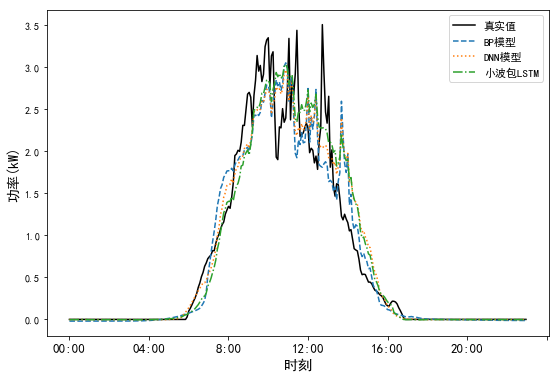

In [61]:
fig = plt.figure(figsize=(9,6))
ax=fig.add_subplot(1,1,1)
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  #SimHei黑体
plt.rcParams['axes.unicode_minus'] = False

plt.plot(Real,label='真实值',c='black',linestyle='-')
# plt.plot(svm_pr,label='SVM模型',linestyle='--',marker = '+')
plt.plot(bp_pr,label='BP模型',linestyle='--')
plt.plot(dnn_pr,label='DNN模型',linestyle=':')
plt.plot(lstm_pr,label='小波包LSTM',linestyle='-.')

# x_labels=ax.set_xticklabels(["one","two","three","four","five"],rotation=30,fontsize="10")
x_labels=ax.set_xticklabels(['','00:00','04:00','8:00','12:00','16:00','20:00'],fontsize="13")
# ax.set_xticks(['00:00','06:00','12:00','18:00'])
plt.ylabel('功率(kW)',fontsize="14")
plt.xlabel('时刻',fontsize="14")
# plt.xticks(['00:00','06:00','12:00','18:00'])
# my_x_ticks=np.arange(0,24,4)
# plt.xticks(my_x_ticks)
# plt.legend(['Train', 'Test'], loc='upper left')
plt.legend(fontsize="11")
plt.savefig('../picture/0324_09.jpg',dpi=300)
plt.savefig('../picture/0324_09.svg',format="svg",dpi=300)

In [44]:
# #日MAE
# dnn_pr = abs(Real-dnn_pr)/(Real+0.001)
# lstm_pr = abs(Real-lstm_pr)/(Real+0.001)
# lstm_wpd = abs(Real-lstm_wpd)/(Real+0.001)

In [ ]:
# figsize=(12,12)
fig = plt.figure(figsize=(6,4.5))
ax=fig.add_subplot(1,1,1)
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  #SimHei黑体
plt.rcParams['axes.unicode_minus'] = False

plt.plot(Real,label='Real',c='black',linestyle='-')
# plt.plot(svm_pr,label='SVM模型',linestyle='--',marker = '+')
# plt.plot(bp_pr,label='BP',c='black',linestyle='-.',marker = '+')
plt.plot(lstm_pr,label='DNN',c='black',linestyle='--')
plt.plot(dnn_wpd,label='LSTM',c='black',linestyle='-.')
plt.plot(dnn_pr,label='WPD-LSTM',c='black',linestyle=':')
# plt.plot(lstm_pr,label='DNN',linestyle='--')

# plt.plot(bp_wpd,label='BP',linestyle='-.')
# plt.plot(dnn_wpd,label='LSTM',c='black',linestyle=':')
# plt.plot(lstm_wpd,label='WPD_DNN',linestyle='--')

# x_labels=ax.set_xticklabels(["one","two","three","four","five"],rotation=30,fontsize="10")
x_labels=ax.set_xticklabels(['','00:00','04:00','8:00','12:00','16:00','20:00'],fontsize="13")
y_labels=ax.set_yticklabels(['','0.0','0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0'],fontsize="13")
# ax.set_xticks(['00:00','06:00','12:00','18:00'])
plt.ylabel('功率(千瓦)',fontsize="13")
plt.xlabel('时刻',fontsize="13")
# plt.xticks(['00:00','06:00','12:00','18:00'])
# my_x_ticks=np.arange(0,24,4)
# plt.xticks(my_x_ticks)
# plt.legend(['Train', 'Test'], loc='upper left')
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 12,
}
plt.legend(prop=font1)
plt.savefig('../picture/3.26晴0729.jpg',dpi=300)
plt.savefig('../picture/3.26晴0729.svg',format="svg",dpi=300)

# 3月份

In [ ]:

predict_[['Month(t-12)', 'Day(t-12)', 'Hour(t-12)', 'Minutes(t-12)']] = predict_[['Month(t-12)', 'Day(t-12)', 'Hour(t-12)', 'Minutes(t-12)']].astype("int")

# month3 = predict_.loc[(predict_['Month(t-1)'] == 3) & ((predict_['Day(t-1)'] == 9)|(predict_['Day(t-1)'] == 10)
#                         |(predict_['Day(t-1)'] == 11)|(predict_['Day(t-1)'] == 12)|(predict_['Day(t-1)'] == 13)|(predict_['Day(t-1)'] == 14)|(predict_['Day(t-1)'] == 15)),:]
month3 = predict_.loc[(predict_['Month(t-12)'] == 3 ),:]
#real_power_day.set_index('time', inplace=False)
Real=month3.set_index('Hour(t-12)', inplace=False)['Station_4(t)']
# svm_pr=month3.set_index('Hour(t-12)', inplace=False)['SVM']
# bp_pr=month3.set_index('Hour(t-12)', inplace=False)['BP']
# dnn_pr=month3.set_index('Hour(t-12)', inplace=False)['DNN']
# lstm_pr=month3.set_index('Hour(t-12)', inplace=False)['LSTM']

In [ ]:
Real.head(5)

In [ ]:
Real = Real.values
# svm_pr = svm_pr.values
# bp_pr = bp_pr.values
# dnn_pr = dnn_pr.values
# lstm_pr = lstm_pr.values

In [ ]:
# Real=Real[1]
# R.shape

In [ ]:
fig = plt.figure(figsize=(13,5))
# figsize=(20,6)
ax=fig.add_subplot(1,1,1)
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  #SimHei黑体
plt.rcParams['axes.unicode_minus'] = False

plt.plot(Real,label='真实值',c='black',linestyle='-')
# plt.plot(svm_pr,label='SVM模型',linestyle='--',marker = '+')
# plt.plot(bp_pr,label='BP模型',linestyle='-.')
# plt.plot(dnn_pr,label='DNN模型',linestyle=':')
# plt.plot(lstm_pr,label='小波包LSTM',linestyle='--')

# x_labels=ax.set_xticklabels(["one","two","three","four","five"],rotation=30,fontsize="10")
# x_labels=ax.set_xticklabels(['','9','10','','11','12','14','15','16','17','18'],fontsize="13")
x_labels=ax.set_xticklabels(['','1','8','15','22','29'],fontsize="13")
# ax.set_xticks(['00:00','06:00','12:00','18:00'])
plt.ylabel('功率(kW)',fontsize="14")
plt.xlabel('日期',fontsize="14")
# plt.xticks(['00:00','06:00','12:00','18:00'])
# my_x_ticks=np.arange(0,24,4)
# plt.xticks(my_x_ticks)
# plt.legend(['Train', 'Test'], loc='upper left')
plt.legend(loc=1,fontsize="13")
# plt.savefig('../picture/predictmonth3.jpg',dpi=300)
# plt.savefig('../picture/predictmonth3.svg',format="svg",dpi=300)